# **Basic State Population Predictor**
### Author: JJ McCauley
Serving as a basic introductory exercise, this program aims to predict the future population of the US by scaping past data, using a simple linear regression model to make a prediction, then visually modeling the data.

In [67]:
# Storing online table
import pandas as pd
import numpy as np
import ssl 
# Linear Regression Model imports
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
# Visualizing data
import matplotlib.pyplot as plt

## Scraping Population Data
First, we will be using the pandas library to scrape the population data off of the web.

In [ ]:
# Cleaning Functions (defined as function for ease)
def convert_percentage_to_float(x):
    if isinstance(x, str) and x.endswith('%'):
        return float(x.rstrip('%'))
    return x

#Retrive the data from the website
url = 'https://www.census.gov/data/tables/time-series/dec/popchange-data-text.html'
ssl._create_default_https_context = ssl._create_unverified_context
scraper = pd.read_html(url)
#Saving the scraper as a pandas dataframe
df = scraper[0]
#Cleaning the data
df = df.applymap(lambda x: x.replace(' ', '_') if isinstance(x, str) else x) #replace spaces with underscores
df.columns = df.columns.str.replace(' ', '_') #replacing the columns
df = df.applymap(convert_percentage_to_float) 
df['State_or_Region'] = df['State_or_Region'].str.upper()
print("---Population Data Loaded---")
print(df)

## Creating the Linear Regression Model & Visualizing
Create a Linear Regression Model using the sklearn, then visualize using pandas library. 
We will be looking at percent change to predict population increase. This doesn't really make any sense, however this is just practice so it is good enough for now. In a real application, more features may be neccessary.

In [124]:
' --- Helper Functions --- '

#Clean the dataframe into a format readible by the model
def Clean_Data(df):
    #Transposing the df to flip rows and columns, making the data readible by the model
    m_df = df.set_index('State_or_Region').T.copy()
    #Adding 'previous population' and 'previous percent change' fields
    m_df['PREVIOUS_POPULATION'] = m_df['RESIDENT_POPULATION'].shift(-1)
    m_df['PREVIOUS_PERCENT_CHANGE'] = m_df['PERCENT_CHANGE'].shift(-1)
    m_df['RESIDENT_POPULATION'] = m_df['RESIDENT_POPULATION'].astype(int) 
    m_df = m_df.dropna()
    
    return m_df #Returning the modified dataframe

#Create a bar chart using matplotlib
def Visualize(df, new_pop):
    #Making a new dataframe for easy plotting
    df = df.reset_index()
    pop_data = df[['index', 'RESIDENT_POPULATION']]
    #Adding the new population
    new_elements = pd.DataFrame({
        'index': ['New Census'],
        'RESIDENT_POPULATION': [new_pop]
    })
    pop_data = pd.concat([new_elements, pop_data], ignore_index=True)
    print(pop_data)
    #Plotting the dataframe with a bar-chart
    pop_data.plot(x='index', y='RESIDENT_POPULATION', kind='bar', title='Population Over Years')
    plt.xlabel('Year')
    plt.ylabel('Population')
    plt.show()
    #Plotting the dataframe with a line-chart
    pop_data.plot(x='index', y='RESIDENT_POPULATION', kind='line', title='Population Over Years')
    plt.xlabel('Year')
    plt.ylabel('Population')
    plt.xticks(rotation=90) #Making the x-labels vertical
    plt.show()

In [125]:
   #Take in the dataframe of the state's population and population change as arguments
def Model_and_Visualize(orignal_df):    
    df = Clean_Data(orignal_df)
    #Extracting x and y
    x = df[['PREVIOUS_POPULATION', 'PREVIOUS_PERCENT_CHANGE']].values
    y = df['RESIDENT_POPULATION'].values
    #Fitting the model and predicting next year's population
    model = LinearRegression()
    model.fit(x, y)
    cur_year = df.index[0] #Getting the most recent year 
    cur_pop = df.at[cur_year, 'RESIDENT_POPULATION']
    cur_percent = df.at[cur_year, 'PERCENT_CHANGE']
    y_pred = model.predict([[cur_pop, cur_percent]])
    new_pop = y_pred[0]
    print("Next Predicted Population: ", new_pop)
    Visualize(df, new_pop)

## Receiving State Input From the User
Lastly, we will ask the user for a state and find it in the pandas dataframe. We will then call our relevant functions to visualize and predict the next resident population.

Next Predicted Population:  6632646.31668693
          index  RESIDENT_POPULATION
0    New Census         6.632646e+06
1   2020_Census         6.177224e+06
2   2010_Census         5.773552e+06
3   2000_Census         5.296486e+06
4   1990_Census         4.781468e+06
5   1980_Census         4.216975e+06
6   1970_Census         3.922399e+06
7   1960_Census         3.100689e+06
8   1950_Census         2.343001e+06
9   1940_Census         1.821244e+06
10  1930_Census         1.631526e+06
11  1920_Census         1.449661e+06


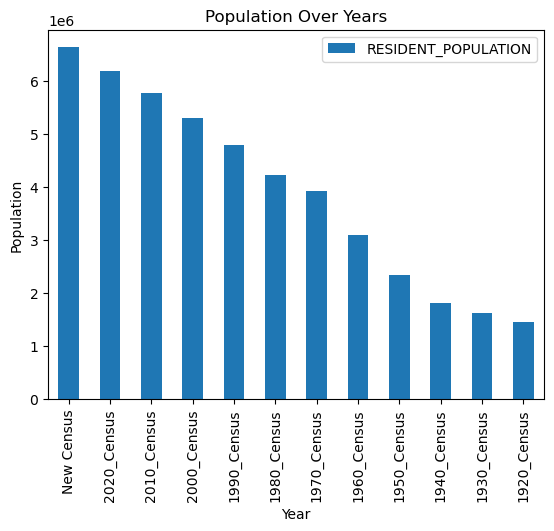

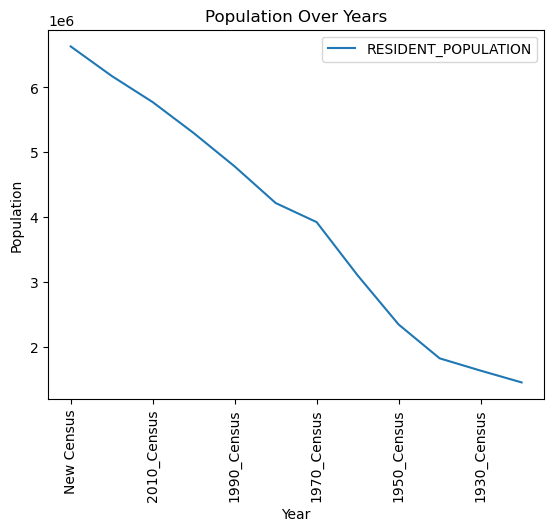

In [126]:
state_to_find = input("Enter the state/region to calculate: ")
state_to_find = state_to_find.upper()

row_indicies, col_indicies = np.where(df.values == state_to_find) #Finding the element
if len(row_indicies) > 0: #If the element was found
    row_index = row_indicies[0]
    state_df = df.iloc[row_index + 1: row_index + 3].copy() #Save the data in a df as a copy
    #Run the Linear Regression Model
    Model_and_Visualize(state_df)
else:
    print("Invalid Input")